In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX


df = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq", engine='pyarrow')
df.date_val = pd.to_datetime(df.date_val)

train_test_sep = datetime(2019, 1, 1)
df_train = df.loc[df.date_val < train_test_sep]
df_test = df.loc[df.date_val >= train_test_sep]


train_a, train_b, train_c = df_train.volume_A.values, df_train.volume_B.values, df_train.volume_C.values
test_a, test_b, test_c = df_test.volume_A.values, df_test.volume_B.values, df_test.volume_C.values

def mpe(actual, prediction):
    return np.mean(np.abs((actual - prediction) / actual))

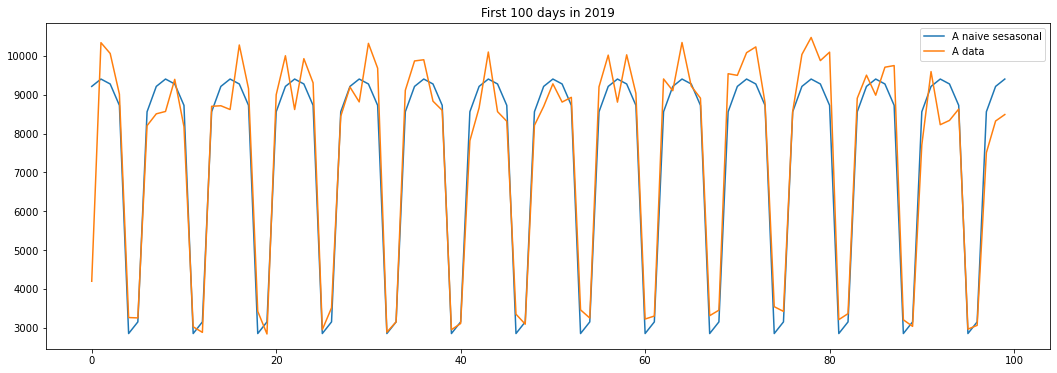

MPEs for naive seasonal forecasting:
A:  0.09593109778047886
B:  0.12403034883162879
C:  0.13832277230977005


In [107]:
# naive sesonal method for benchmarking
def naive_season(steps, period=7):
    index_base = df_train.index[-1] +1 - 3*period # 3 instead of 2 or 1 to
                            # avoid holidays on the last weeks of the year.
    indices = index_base + np.arange(0, steps, dtype=int)%period
    return df_train.iloc[indices]

naive_season_2019 = naive_season(len(df_test))

naive_a = naive_season_2019.volume_A.values
naive_b = naive_season_2019.volume_B.values
naive_c = naive_season_2019.volume_C.values

plt.figure(figsize=(18, 6))
plt.title("First 100 days in 2019")
plt.plot(naive_a[:100], label='A naive sesasonal')
plt.plot(test_a[:100], label='A data')
plt.legend()
plt.show()

print("MPEs for naive seasonal forecasting:")
print("A: ", mpe(test_a, naive_a))
print("B: ", mpe(test_b, naive_b))
print("C: ", mpe(test_c, naive_c))